In [2]:
!pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

: 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [64]:
data = pd.read_csv("C:/Users/ncmia/OneDrive/Desktop/Depression_Student_Dataset_Unclean.csv")
data.head()

,ID,Gender,Age,Academic Pressure,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,Male,28.0,2.0,7-8 hours,Moderate,Yes,9.0,2.0,Yes,No
1,2,Male,28.0,NaN,5-6 hours,Healthy,Yes,7.0,NaN,Yes,No
2,3,Male,25.0,1.0,5-6 hours,Unhealthy,Yes,10.0,4.0,No,Yes
3,4,Male,23.0,1.0,More than 8 hours,Unhealthy,Yes,7.0,2.0,Yes,No
4,5,Female,31.0,1.0,More than 8 hours,Healthy,Yes,4.0,2.0,Yes,No


This dataset examines the connection between mental health and various demographic, academic, and lifestyle factors. It includes attributes such as gender, age, academic pressure, study satisfaction, sleep duration, dietary habits, study hours, financial stress, family history of mental illness, depression, and suicidal thoughts. The dataset enables an exploration of how factors like sleep quality, diet, and academic workload impact mental well-being, offering potential applications in identifying patterns of mental health risks and promoting preventive strategies for improved mental health outcomes among different demographic groups.

In [65]:
data.tail()

,ID,Gender,Age,Academic Pressure,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
497,498,Male,26.0,5.0,More than 8 hours,Unhealthy,No,8.0,3.0,No,Yes
498,499,Male,24.0,2.0,Less than 5 hours,Unhealthy,Yes,8.0,5.0,No,Yes
499,500,Female,NaN,3.0,5-6 hours,Healthy,No,1.0,5.0,Yes,No
500,501,Male,100.0,4.0,More than 8 hours,Healthy,No,8.0,1.0,Yes,No
501,502,Male,18.0,5.0,More than 8 hours,Unhealthy,No,NaN,2.0,Yes,Yes


This shows the last five rows of the dataset

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ID                                     502 non-null    int64  
 1   Gender                                 502 non-null    object 
 2   Age                                    452 non-null    float64
 3   Academic Pressure                      446 non-null    float64
 4   Sleep Duration                         487 non-null    object 
 5   Dietary Habits                         492 non-null    object 
 6   Have you ever had suicidal thoughts ?  494 non-null    object 
 7   Study Hours                            450 non-null    float64
 8   Financial Stress                       450 non-null    float64
 9   Family History of Mental Illness       489 non-null    object 
 10  Depression                             502 non-null    object 
dtypes: flo

this shows the dataype of each column 

In [67]:
data.nunique()

ID                                       502
Gender                                     2
Age                                       23
Academic Pressure                         12
Sleep Duration                             4
Dietary Habits                             3
Have you ever had suicidal thoughts ?      2
Study Hours                               17
Financial Stress                           9
Family History of Mental Illness           2
Depression                                 2
dtype: int64

In [68]:
data.isnull().sum()

ID                                        0
Gender                                    0
Age                                      50
Academic Pressure                        56
Sleep Duration                           15
Dietary Habits                           10
Have you ever had suicidal thoughts ?     8
Study Hours                              52
Financial Stress                         52
Family History of Mental Illness         13
Depression                                0
dtype: int64

this shows how much data are missing

In [69]:
(data.isnull().sum()/(len(data)))*100

ID                                        0.000000
Gender                                    0.000000
Age                                       9.960159
Academic Pressure                        11.155378
Sleep Duration                            2.988048
Dietary Habits                            1.992032
Have you ever had suicidal thoughts ?     1.593625
Study Hours                              10.358566
Financial Stress                         10.358566
Family History of Mental Illness          2.589641
Depression                                0.000000
dtype: float64

this is the percentage of missing values in each row

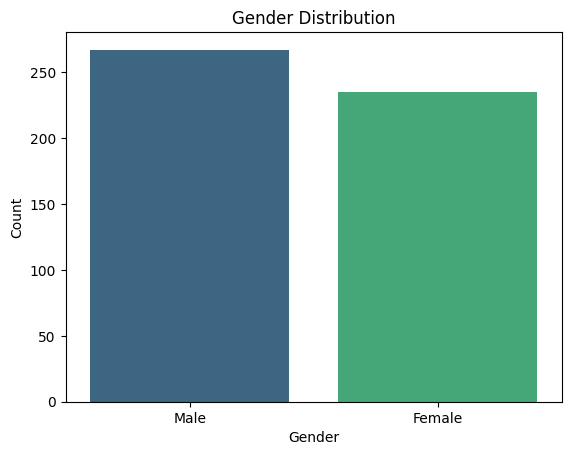

In [70]:
sns.countplot(x='Gender', data=data, palette='viridis')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

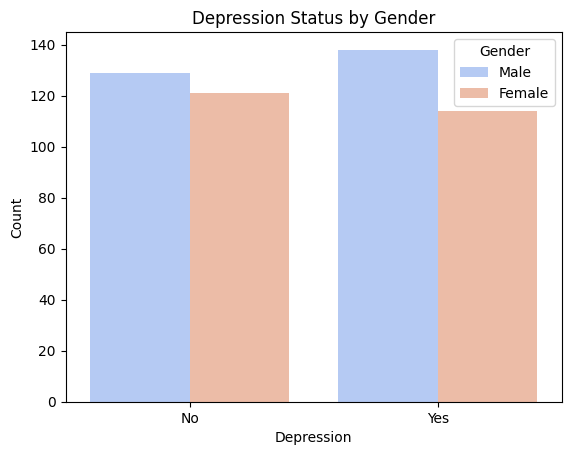

In [71]:
sns.countplot(x='Depression', hue='Gender', data=data, palette='coolwarm')
plt.title('Depression Status by Gender')
plt.xlabel('Depression')
plt.ylabel('Count')
plt.show()

this shows that there are more number of male in depression than female but also shows there are more male not depressed than female

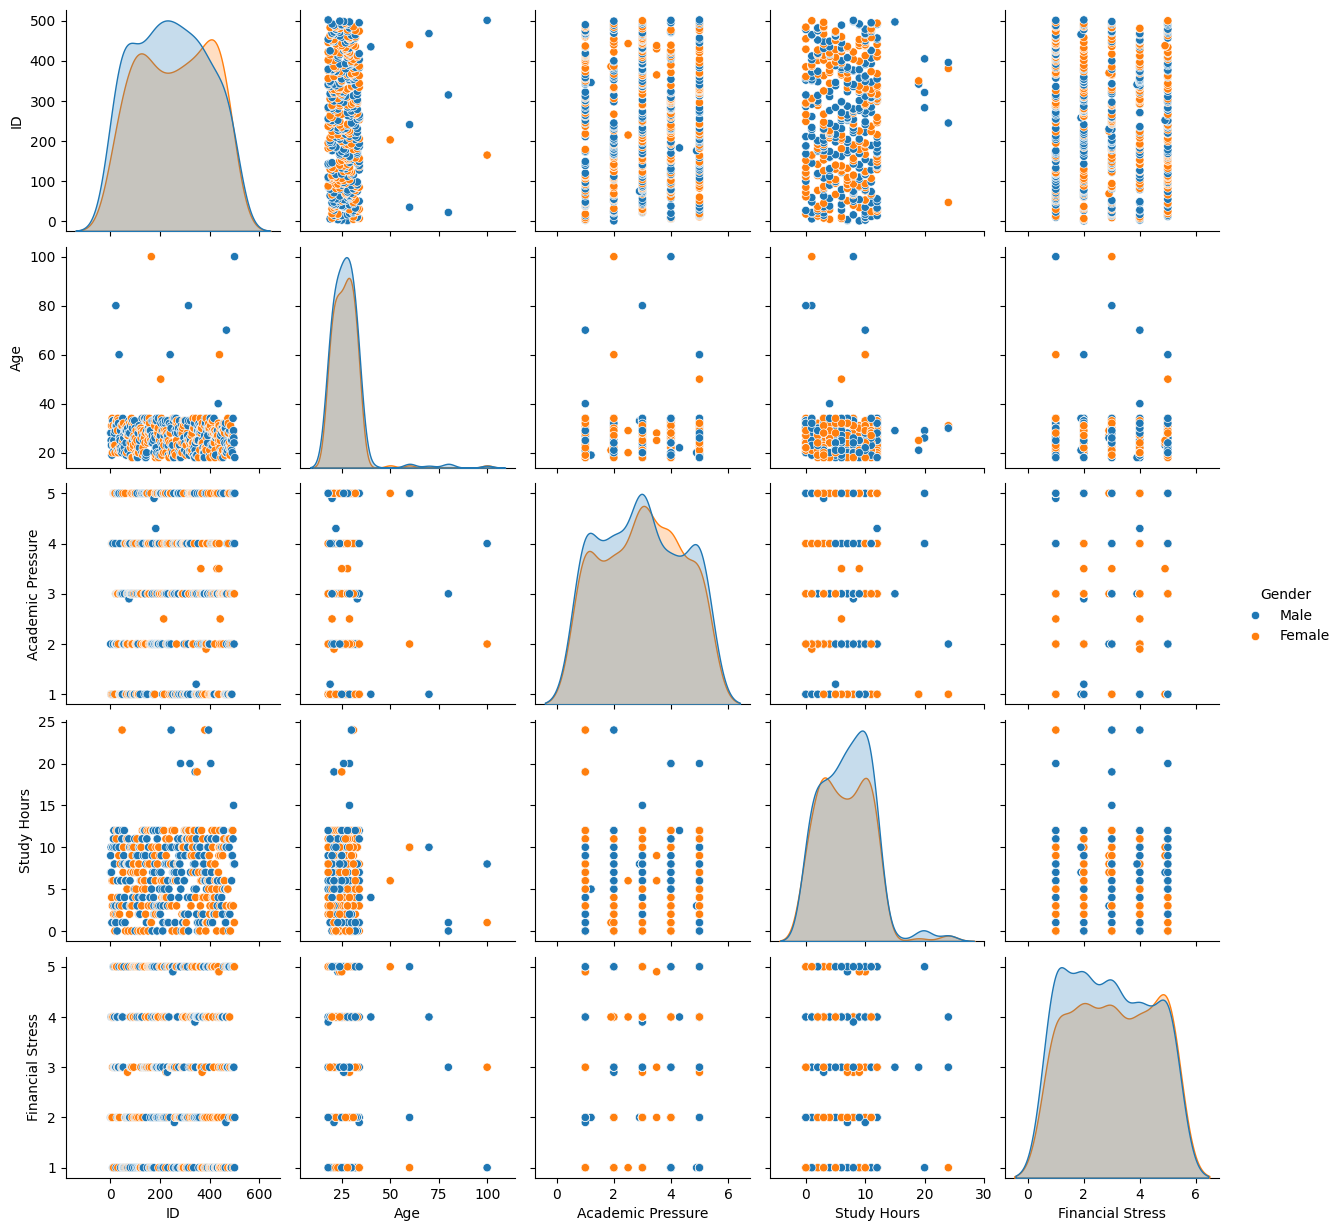

In [ ]:
sns.pairplot(data, hue ='Gender')

plt.show()

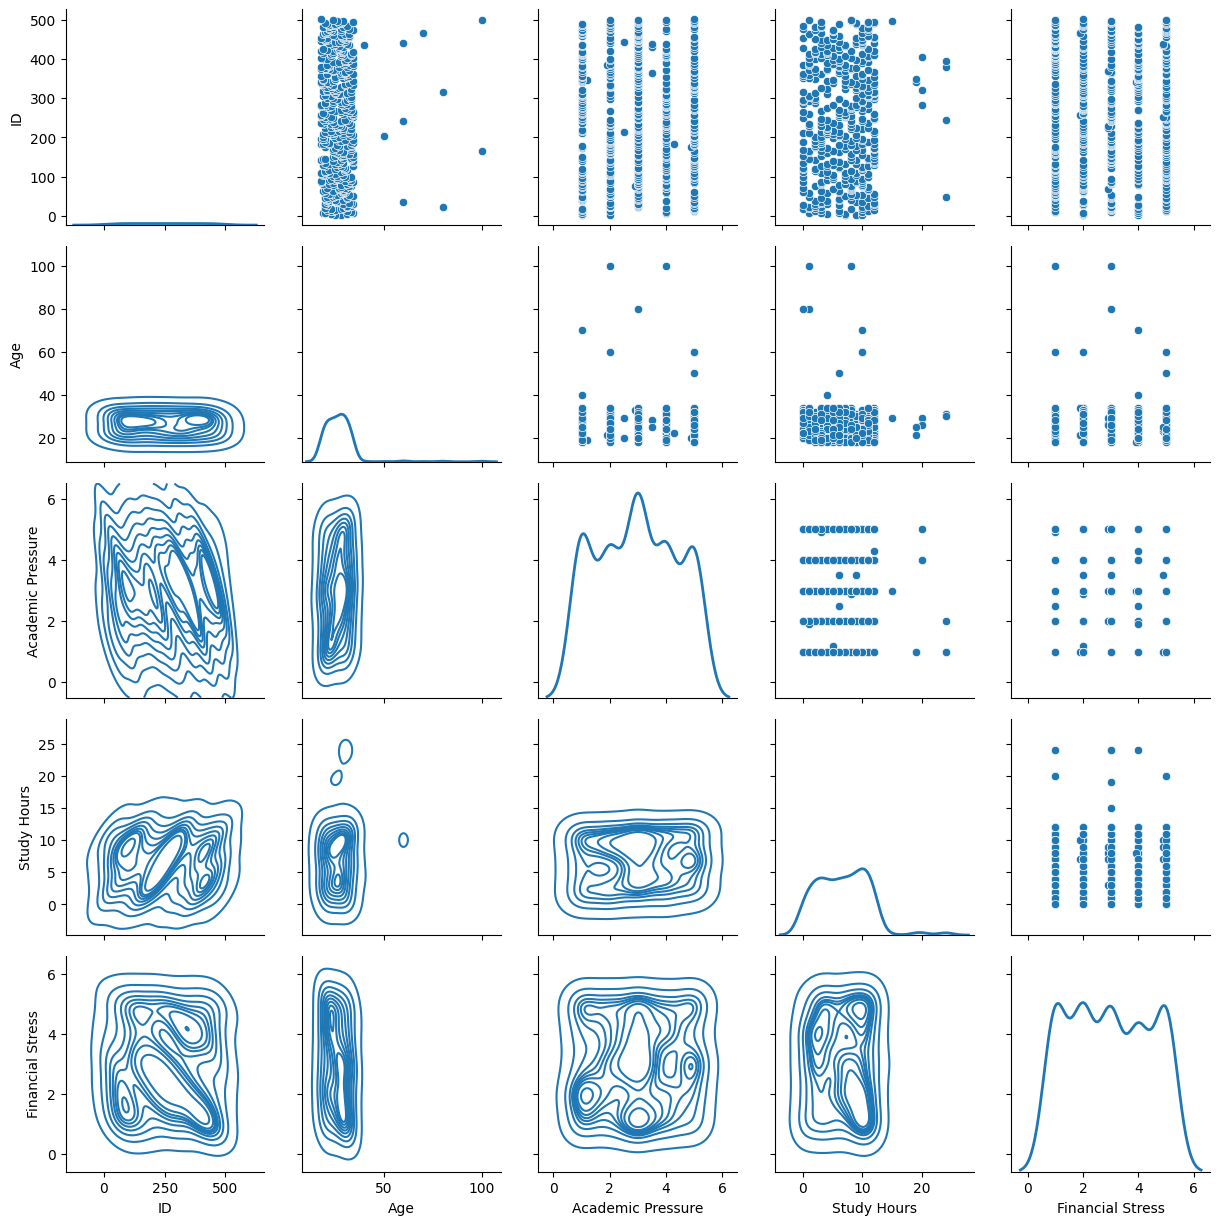

In [ ]:
graph = sns.PairGrid(data)

graph = graph.map_upper(sns.scatterplot)

graph = graph.map_lower(sns.kdeplot)

graph = graph.map_diag(sns.kdeplot, lw = 2)

plt.show()

In [74]:
print("Null values before replacement:\n")
print(data.isnull().sum())

Null values before replacement:

ID                                        0
Gender                                    0
Age                                      50
Academic Pressure                        56
Sleep Duration                           15
Dietary Habits                           10
Have you ever had suicidal thoughts ?     8
Study Hours                              52
Financial Stress                         52
Family History of Mental Illness         13
Depression                                0
dtype: int64


In [75]:
numerical_columns = ['Age', 'Academic Pressure', 'Study Hours', 'Financial Stress']

mean_values = data[numerical_columns].mean()

print("\nMean values for numerical columns:\n")
print(mean_values)


Mean values for numerical columns:

Age                  27.097345
Academic Pressure     2.970179
Study Hours           6.697778
Financial Stress      2.971111
dtype: float64


In [76]:
data[numerical_columns] = data[numerical_columns].fillna(mean_values)
print("\nNull values after replacement:\n")
print(data.isnull().sum())


Null values after replacement:

ID                                        0
Gender                                    0
Age                                       0
Academic Pressure                         0
Sleep Duration                           15
Dietary Habits                           10
Have you ever had suicidal thoughts ?     8
Study Hours                               0
Financial Stress                          0
Family History of Mental Illness         13
Depression                                0
dtype: int64


In [ ]:
statistics = {}
for col in numerical_columns:
    statistics[col] = {
        'Mean': data[col].mean(),
        'Median': data[col].median(),
        'Mode': data[col].mode()[0]  
    }

In [78]:
stats_df = pd.DataFrame(statistics).T
print("Mean, Median, and Mode for Numerical Columns:\n")
print(stats_df)

Mean, Median, and Mode for Numerical Columns:

                        Mean     Median       Mode
Age                27.097345  27.097345  27.097345
Academic Pressure   2.970179   3.000000   3.000000
Study Hours         6.697778   6.697778   6.697778
Financial Stress    2.971111   3.000000   1.000000


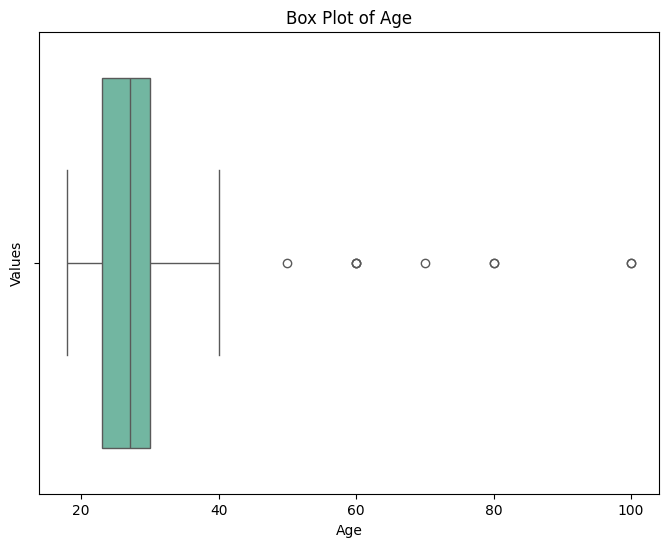

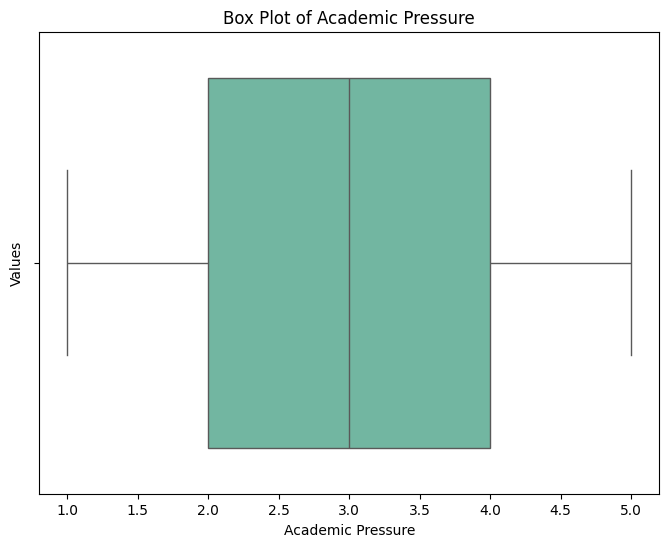

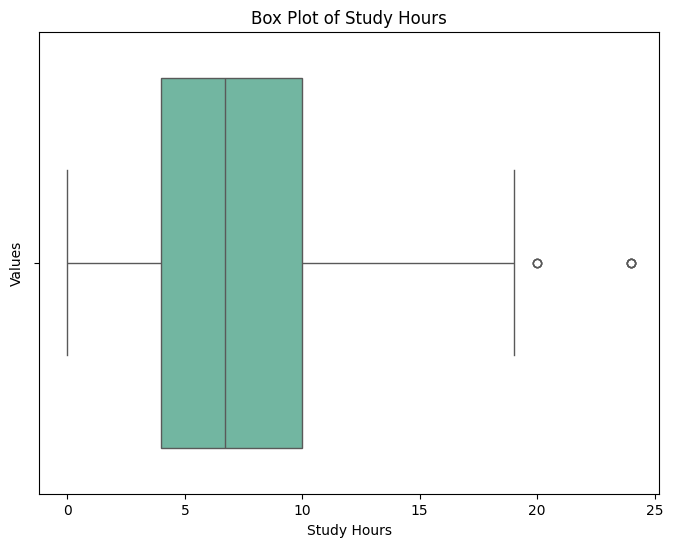

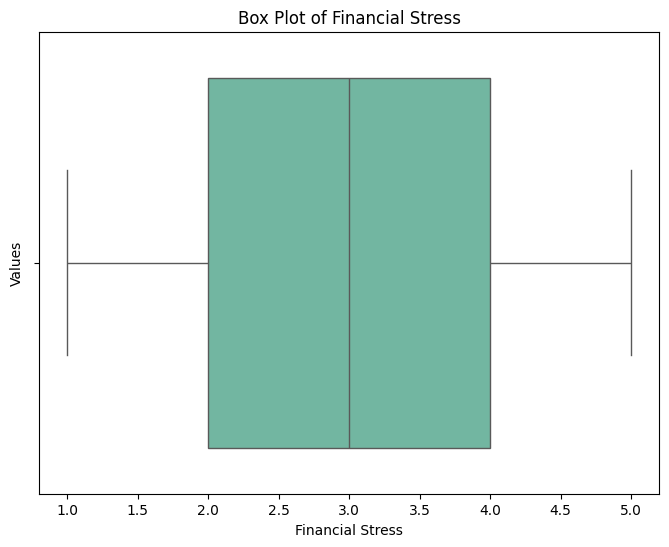

In [ ]:
#Univariate analysis 
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, x=col, palette="Set2")
    
    plt.title(f"Box Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Values")
    
    plt.show()

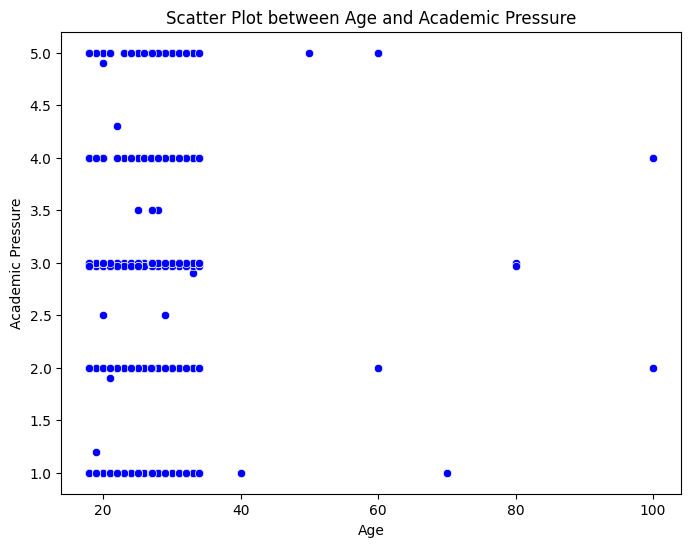

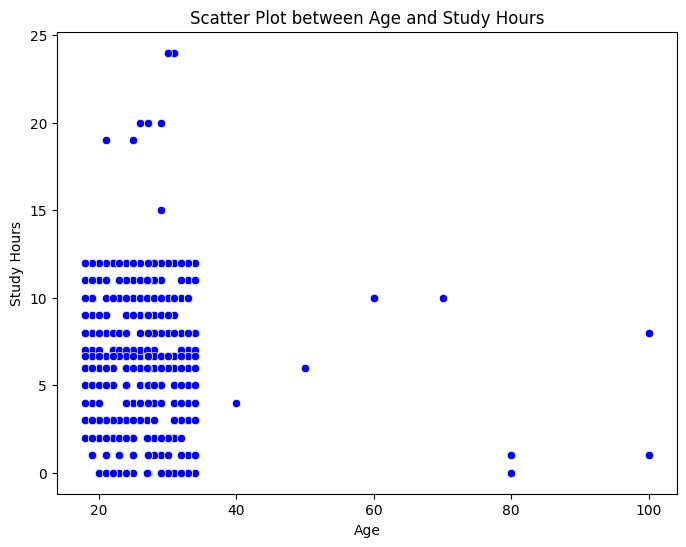

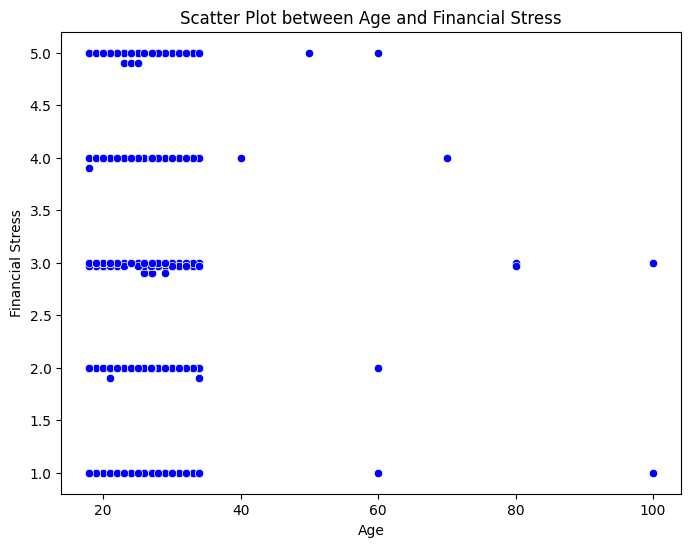

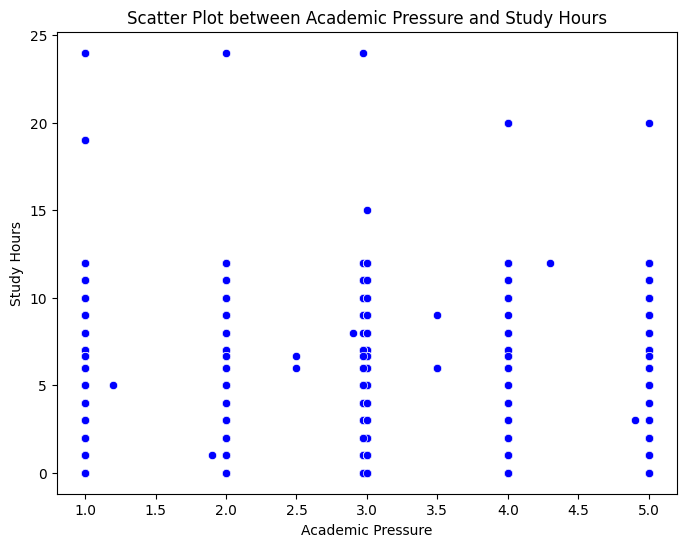

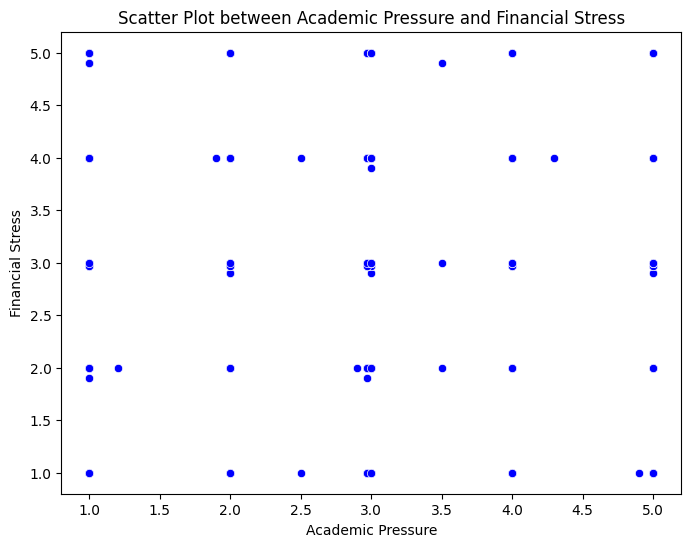

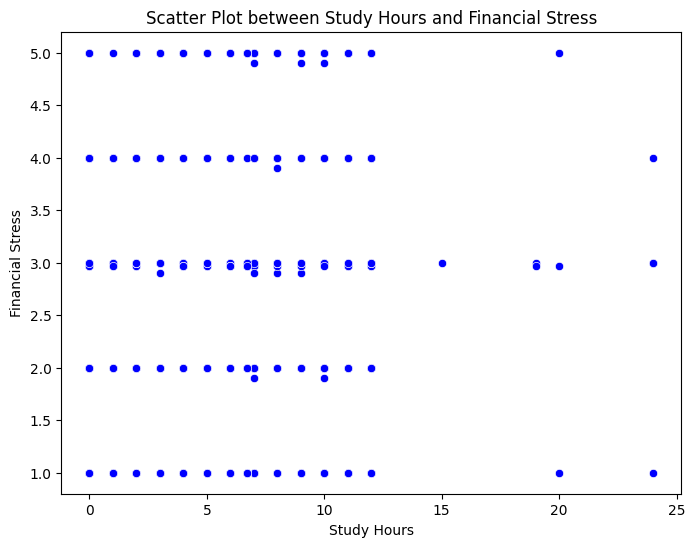

In [ ]:
#Bivariate analysis
# Scatter plots between each pair of numerical columns
for i in range(len(numerical_columns)):
    for j in range(i+1, len(numerical_columns)):
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=data, x=numerical_columns[i], y=numerical_columns[j], color='blue')
        
        
        plt.title(f"Scatter Plot between {numerical_columns[i]} and {numerical_columns[j]}")
        plt.xlabel(numerical_columns[i])
        plt.ylabel(numerical_columns[j])
        
        plt.show()


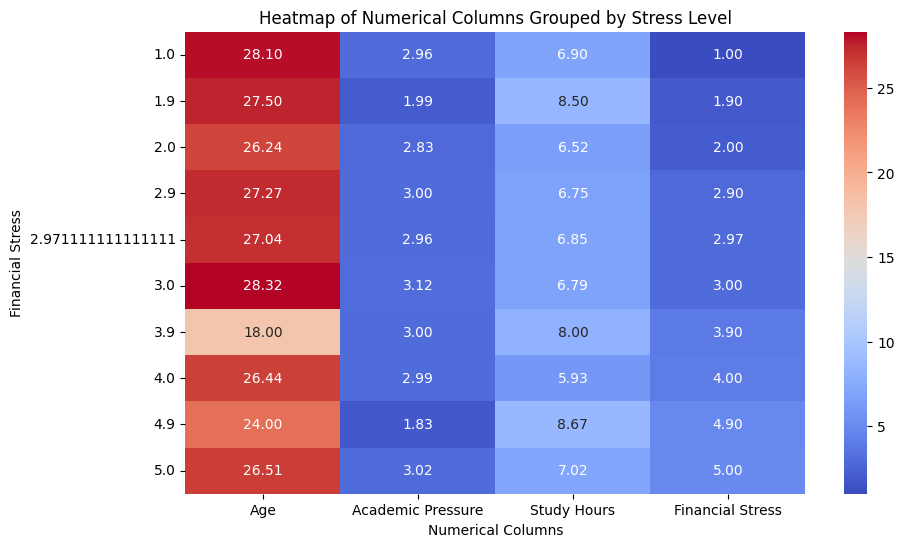

In [ ]:
# Multivariate Analysis 
categorical_hue = 'Financial Stress'

# Group data by the categorical variable and calculate the mean for numeric columns
grouped_data = data.groupby(categorical_hue)[numerical_columns].mean()


plt.figure(figsize=(10, 6))
sns.heatmap(grouped_data, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

plt.title("Heatmap of Numerical Columns Grouped by Stress Level")
plt.xlabel("Numerical Columns")
plt.ylabel(categorical_hue)

plt.show()



this shows the heatmap of all the columns with comparison to financial stress column and helps to highlight differences within a subset of the data.

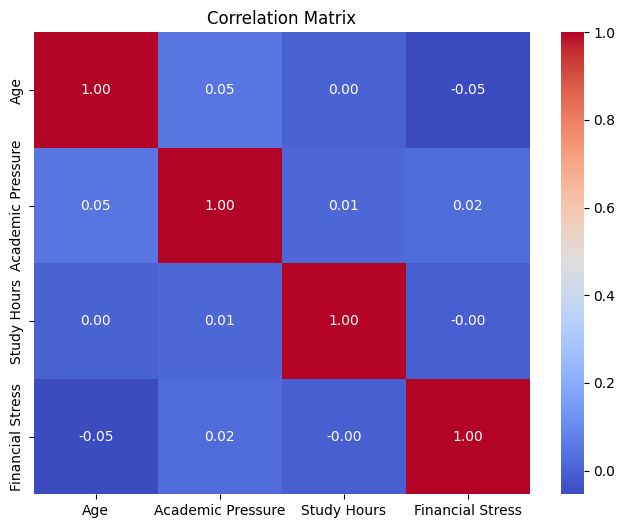

In [85]:
# Compute and plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Matrix")
plt.show()

Shows correlations (positive or negative relationships) among variables.